
### Nhận dạng khuôn mặt sử dụng PCA and SVM trên tập dữ liệu "Labelled Faces in the Wild"


#### import một số thư việc cài đặt thuật toán

In [49]:
from sklearn.datasets import fetch_lfw_people
# import pylab as pl
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#### Hàm hiển thị một số hình ảnh ngẫu nhiên

In [50]:
def title(y, labels):
    return [ labels[i] for i in y]
def plot_gallery(images, titles,img_size=(200,200),title="None", n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row),facecolor=(1, 1, 1))
    plt.title(title)
    
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    randomlist = rd.sample(range(len(images)), n_row*n_col)
    for idex,i in enumerate( randomlist):
        
        plt.subplot(n_row, n_col, idex + 1)
        plt.imshow(images[i].reshape(img_size), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#### Tải bộ dữ liệu "Labelled Faces in the Wild" từ thư viện sklearn vào X và y



In [51]:
# Tải những người nào có trên 50 khuôn mặt 
lfw_database = fetch_lfw_people(min_faces_per_person=50)
n_samples, h, w = lfw_database.images.shape
re_size=(h,w)
# the label to predict is the id of the person
X,y, labels= lfw_database.data, lfw_database.target, lfw_database.target_names
print("Số mẫu ảnh: ", n_samples)
print("Số chiều của ảnh:", re_size)
print("số đối tượng:", len(labels))

Số mẫu ảnh:  1560
Số chiều của ảnh: (62, 47)
số đối tượng: 12


MỘT SỐ DỮ LIỆU KHUÔN MẶT:


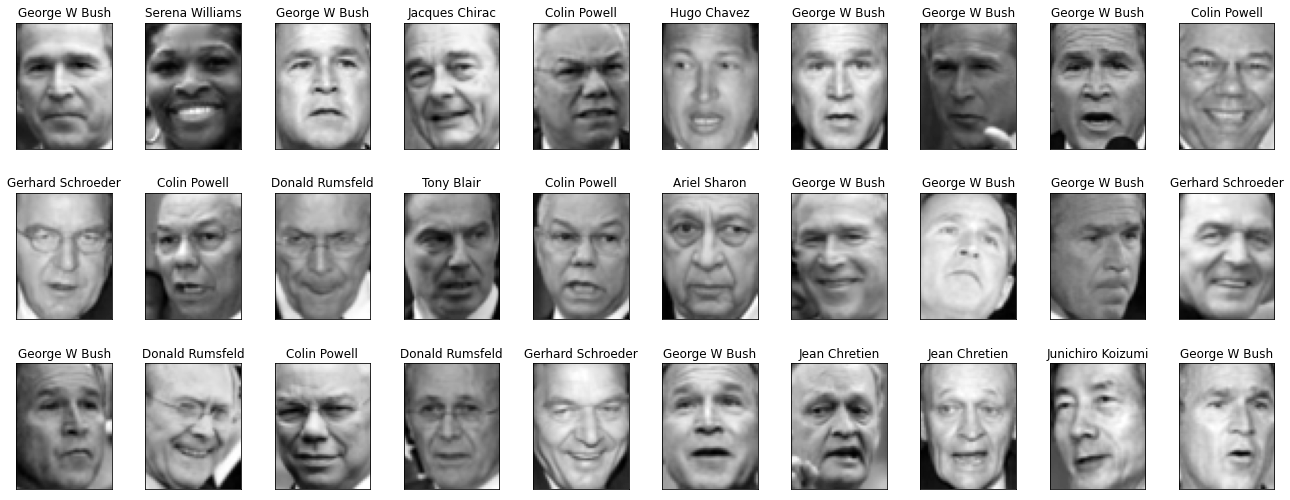

In [52]:
print("MỘT SỐ DỮ LIỆU KHUÔN MẶT:")
plot_gallery(X,title(y, labels),img_size=re_size,n_row=3,n_col=10)

#### Phân chia dữ liệu ảnh thành 2 tập train và test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.25, random_state=42)

In [54]:
print("*số chiều tập train:",np.array(X_train).shape)
print("*số chiều tập test:",np.array(X_test).shape)

*số chiều tập train: (1170, 2914)
*số chiều tập test: (390, 2914)


#### Sử dụng thư viện PCA để giảm chiều dữ liệu ảnh

In [55]:
n_components = 100
pca = PCA(n_components=n_components,  whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca =pca.transform(X_test)

print("*số chiều tập train qua bước PCA:",np.array(X_train_pca).shape)
print("*số chiều tập test  qua bước PCA:",np.array(X_test_pca).shape)

*số chiều tập train qua bước PCA: (1170, 100)
*số chiều tập test  qua bước PCA: (390, 100)


 #### Hiển thị ảnh eigenfaces sau khi giảm chiều

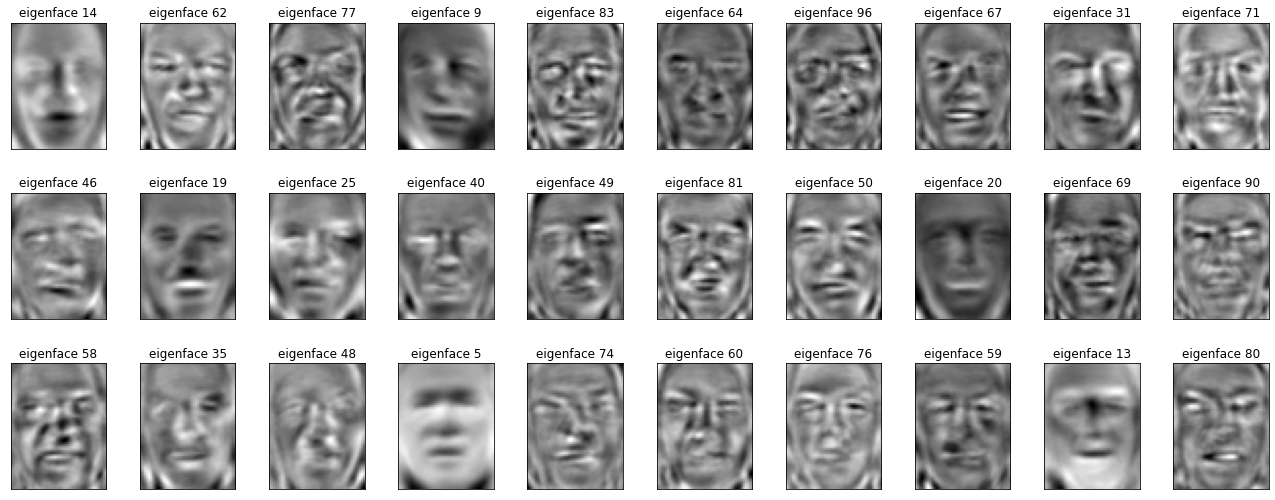

In [56]:
eigenfaces = pca.components_.reshape((n_components, re_size[0], re_size[1]))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles,re_size,n_row=3,n_col=10)

#### sử dụng thử viện SVC(mutilclass với phương pháp one vs one) để khớp dữ liệu từ tập train 


In [57]:
print("Thư việc SVC(one vs one method) khớp dữ liệu từ PCA train:")
param = {
         'C': [1000, 5000, 10000, 50000, 100000],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
kernel='rbf'
model = GridSearchCV(SVC(kernel=kernel, class_weight='balanced'), param)
model.fit(X_train_pca, y_train)
print("Ước lượng tốt nhất cho các tham số C và gamma: ",end='')
print(model.best_estimator_)

Thư việc SVC(one vs one method) khớp dữ liệu từ PCA train:
Ước lượng tốt nhất cho các tham số C và gamma: SVC(C=1000, class_weight='balanced', gamma=0.005)


#### Dự đoán y_predict từ X_test_pca

In [58]:
y_pred = model.predict(X_test_pca)

#### Hiển thị một số hình ảnh của tập test là lable sau khi dự doán

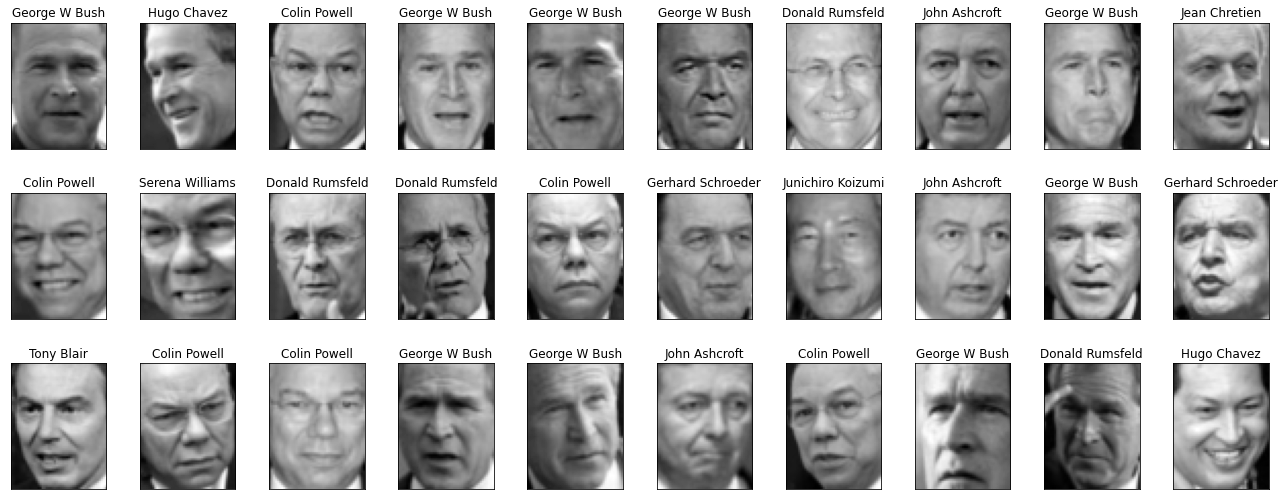

In [59]:
plot_gallery(X_test,title(y_pred,labels),re_size,n_row  = 3, n_col=10)

#### Đánh giá độ chính xác

In [60]:
#Độ chính xác của dữ liệu dự đoán so với ban đầu
acc=accuracy_score(y_test,y_pred)
print("Số ảnh dự đoán chính xác:",acc*len(y_test),"/",len(y_test))
print("Tỉ lệ dự đoán chính xác: {}%".format(acc*100))

Số ảnh dự đoán chính xác: 330.0 / 390
Tỉ lệ dự đoán chính xác: 84.61538461538461%
